# Project: FBI GUN DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>Investingating the FBI GUN DATASET to analyse the overall gun trends, the states with the highest registration as well as the census with a high gun per capita. The data was gotten from the document [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). 


### Question(s) for Analysis
>We'll be answering the questions posed in the document source for our dataset.
The questions are:
What census data is most associated with high gun per capita?
Which states have had the highest growth in gun registrations?
What is the overall trend of gun purchases?

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [275]:
# load datasets
df_gun = pd.read_csv('gun_data.csv')
df_census = pd.read_csv('u.s._census_data.csv')


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [29]:
df_fact = df_census.query('Fact =="Fact Note"')
df_census = df_census.drop(0) # delete the first column to show datasets of all the states only

In [282]:
# convert month from object to datetime
df_month = df_gun.month
df_month = pd.to_datetime(df_month)
df_month.head()
df_gun['month'] = df_month
df_gun.dtypes

month                        datetime64[ns]
state                                object
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                              int64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

In [283]:
# check for duplicates and drop duplicates for gun data
df_gun.duplicated().sum()

0

In [32]:
# check for duplicates and drop duplicates for census data
df_census.duplicated().sum()

5

In [33]:
# drop duplicates and drop duplicates for census data
df_census = df_census.drop_duplicates()

In [34]:
# check now for duplicates after drop duplicates for census data
df_census.duplicated().sum()

0

In [284]:
# check for NaN fields in gun data and replace with mean columns
df_gun.isna().sum().sum()

154595

In [285]:
# replace NaN fields with mean column
gun_means = df_gun.mean()
df_gun= df_gun.fillna(gun_means)

In [286]:
# check for NaN fields in gun data and replace with mean columns
df_gun.isna().sum().sum()

0

In [38]:
# check for NaN fields in census data and replace with mean columns
df_census.isna().sum().sum()

2854

In [39]:
# replace NaN fields with zero 
df_census= df_census.fillna(0)

In [40]:
# check for NaN fields in census data and replace with mean columns
df_census.isna().sum().sum()

0

In [287]:
# subset all gun columns
df_guns = df_gun.loc[:, ['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other']]

In [288]:
# convert df_guns from string to integers
df_guns = df_guns.astype(int)

In [289]:
df_guns.dtypes

permit                       int64
permit_recheck               int64
handgun                      int64
long_gun                     int64
other                        int64
admin                        int64
prepawn_handgun              int64
prepawn_long_gun             int64
prepawn_other                int64
redemption_handgun           int64
redemption_long_gun          int64
redemption_other             int64
returned_handgun             int64
returned_long_gun            int64
returned_other               int64
rentals_handgun              int64
rentals_long_gun             int64
private_sale_handgun         int64
private_sale_long_gun        int64
private_sale_other           int64
return_to_seller_handgun     int64
return_to_seller_long_gun    int64
return_to_seller_other       int64
dtype: object

In [290]:
# replace gun columns in df_gun to converted integers
df_gun.loc[:, ['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other']] = df_guns.loc[:, ['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other']]

df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717,0,5734,6320,221,317,0,15,...,0,0,0,9,16,3,0,0,3,32019
1,2017-09-01,Alaska,209,2,2320,2930,219,160,0,5,...,0,0,0,17,24,1,0,0,0,6303
2,2017-09-01,Arizona,5069,382,11063,7946,920,631,0,13,...,0,0,0,38,12,2,0,0,0,28394
3,2017-09-01,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,0,0,13,23,0,0,2,1,17747
4,2017-09-01,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,0,0,123506
5,2017-09-01,Colorado,4356,0,15751,13448,1007,1062,0,0,...,1,0,0,0,0,0,0,0,0,35873
6,2017-09-01,Connecticut,4343,673,4834,1993,274,0,0,0,...,0,0,0,0,0,0,0,0,0,12117
7,2017-09-01,Delaware,275,0,1414,1538,66,68,0,0,...,0,0,0,55,34,3,1,2,0,3502
8,2017-09-01,District of Columbia,1,0,56,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,61
9,2017-09-01,Florida,10784,0,39199,17949,2319,1721,1,18,...,0,0,0,11,9,0,0,1,0,77390


In [45]:
df_census

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,Unnamed: 76,Value Flags,-,D,F,FN,NA,S,X,Z
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,0.0,0.0,0,0,0,0,0,0,0,0
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,0.0,0.0,0,0,0,0,0,0,0,0
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,0.0,0.0,0,0,0,0,0,0,0,0
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,0.0,0.0,0,0,0,0,0,0,0,0
5,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,0.0,0.0,0,0,0,0,0,0,0,0
6,Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,...,0.0,0.0,0,0,0,0,0,0,0,0
7,Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,...,0.0,0.0,0,0,0,0,0,0,0,0
8,Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,...,0.0,0.0,0,0,0,0,0,0,0,0
9,Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,0.0,0.0,0,0,0,0,0,0,0,0
10,Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,...,0.0,0.0,0,0,0,0,0,0,0,0


In [46]:
# rename 'Fact' column to 'state'
df_census.rename(columns= {'Fact':'state'}, inplace = True)

In [79]:
df_census
df_gun[df_gun.state=='Kentucky']
df_gun.groupby('state')['totals'].max().max()

541978

In [124]:
mean_totals = df_gun.totals.mean()
mean_totals

21595.725911093312

In [88]:
df_merge_gun_census = df_gun.merge(df_census, on='state', how='left')
df_merge_gun_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Columns: 112 entries, month to Z
dtypes: datetime64[ns](1), float64(20), int64(25), object(66)
memory usage: 10.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### 1) What census data is most associated with high gun per capita?

In [128]:
# Merge the gun data and the census data with left join
df_merge_gun_census = df_gun.merge(df_census, on='state', how='left')
df_t_s = df_merge_gun_census.loc[:, (['state','totals'])]
df_t_s.describe()

,totals
count,12485.000000
mean,21595.725911
std,32591.418387
min,0.000000
25%,4638.000000
50%,12399.000000
75%,25453.000000
max,541978.000000


In [142]:
# find the mean totals of the merged dataset
mean_totals = df_merge_gun_census.totals.mean()
mean_totals

21595.725911093312

In [320]:
# query the merged dataset for all states greater than mean totals
## add to subset df_high_gun_census
df_high_gun_census = df_t_s.query('totals > 21595.725911093312')
df_high_gun_census.head()

,state,totals
0,Alabama,32019
2,Arizona,28394
4,California,123506
5,Colorado,35873
9,Florida,77390


### 2) Which states have had the highest growth in gun registrations?

In [221]:
# group the state, totals column by the mean totals of each state
df_s_t = df_high_gun_census.groupby('state')['totals'].mean()
df_s_t = df_s_t.reset_index()
df_s_t.head()
df_s_t.describe()
df_s_t = df_s_t.query('totals >= 41245.484630')

In [236]:
# set the x and y axes
state = df_s_t.iloc[ : , :1]
state.head()
totals = df_s_t.iloc[ : , 1:]
totals = totals.round()
totals = totals.astype(int)
totals.dtypes
df_s_t

,state,totals
3,California,84123.725664
6,Florida,56625.668367
8,Illinois,68458.017699
9,Indiana,53520.150442
12,Kentucky,179984.610063
26,Pennsylvania,58114.420354
28,Tennessee,41572.414286
29,Texas,85984.035398
30,Utah,44717.929825


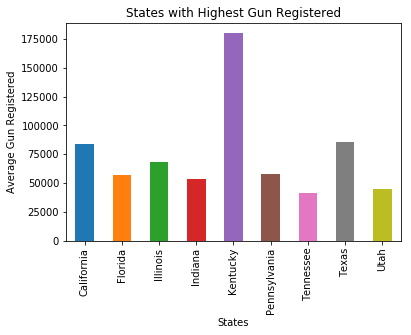

In [318]:
# plot a bar chart for states against totals
fig = plt.figure(),
df_s_t.plot(x='state', y='totals', kind ='bar', title = 'States with Highest Gun Registered', legend=False),
plt.xlabel('States'),
plt.ylabel('Average Gun Registered');

The bar chart plot above describes the distribution of the gun registrartion across various states. 
As observed, the state- Kentucky had the highest mean gun registration value more that Texas and California

### 3) What is the overall trend of gun purchases?

In [292]:
# create a year column
df_gun.month.dtypes
df_gun['year'] = pd.DatetimeIndex(df_gun['month']).year
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,2017-09-01,Alabama,16717,0,5734,6320,221,317,0,15,...,0,0,9,16,3,0,0,3,32019,2017
1,2017-09-01,Alaska,209,2,2320,2930,219,160,0,5,...,0,0,17,24,1,0,0,0,6303,2017
2,2017-09-01,Arizona,5069,382,11063,7946,920,631,0,13,...,0,0,38,12,2,0,0,0,28394,2017
3,2017-09-01,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,0,13,23,0,0,2,1,17747,2017
4,2017-09-01,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,0,123506,2017


In [297]:
# groupby year for all guns and permit purchase
df_year = df_gun.groupby('year')['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other'].mean()
df_year.head()

,permit,permit_recheck,handgun,long_gun,other,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,...,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other
year,,,,,,,,,,,,,,,,,,,,,
1998,768.927273,1165.0,2053.990909,5369.100000,360.0,20.700000,4.000000,7.000000,0.0,407.000000,...,7.0,1.0,0.0,0.0,14.0,11.0,1.0,0.0,0.0,0.0
1999,1640.289394,1165.0,3906.542424,7988.062121,360.0,225.031818,4.000000,7.000000,0.0,407.000000,...,7.0,1.0,0.0,0.0,14.0,11.0,1.0,0.0,0.0,0.0
2000,1860.324242,1165.0,3321.028788,7242.390909,360.0,199.466667,4.000000,7.000000,0.0,407.000000,...,7.0,1.0,0.0,0.0,14.0,11.0,1.0,0.0,0.0,0.0
2001,2133.845455,1165.0,3283.656061,7489.962121,360.0,151.706061,4.936364,10.198485,0.0,346.157576,...,7.0,1.0,0.0,0.0,14.0,11.0,1.0,0.0,0.0,0.0
2002,2065.471212,1165.0,2795.624242,6680.774242,360.0,116.415152,7.706061,16.809091,0.0,259.784848,...,7.0,1.0,0.0,0.0,14.0,11.0,1.0,0.0,0.0,0.0


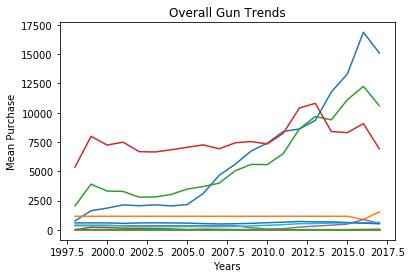

In [316]:
# plot a line plot of the year against the mean purchase
fig = plt.figure();
df_year.plot.line(legend=False, title ='Overall Gun Trends');
plt.xlabel('Years');
plt.ylabel('Mean Purchase');

The aim of the line plot was to view the trends of gun purchase across different years in the United States.
It can be observed that there was a rise in gun purchase from 2005-2015, and a sharp decline afterwards.

<a id='conclusions'></a>
## Conclusions

> From our exploratory analysis,
- The state with a high gun registration is KENTUCKY
- There was an increase in gun purchase trend up till 2016
- The census data has the state as a variable with varying mean totals


## Limitations

- Some of the Limitations I encountered while investigating the data set was a series of null values, which I replace with the mean values. I wonder if I'd replaced this null values with zeros, would my dataset be affected or greatly skewed.
- Vast dataset, lots of cleaning needed to be done before answering the questions with numerous null values, not stating some needed data from the Census dataset.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [3]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0